Инструкция по выполнению проекта
# Изучаем общую информацию


Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D://Игорь/projects/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Подготовка данных
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [5]:
df = df.rename(columns = str.lower)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

- В столбце name 2 пропуска (удалим)
- year_of_release    269 пропусков (удалим)
- critic_score       8578 пропусков (с ними ничего не сделать, можно только заменить на NaN)
- user_score         6701 пропуск (с ними ничего не сделать, можно только заменить на NaN)
- rating             6766 пропусков (с ними ничего не сделать, можно только заменить на NaN)

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int32', errors='ignore')
df.user_score.replace('tbd', np.nan, inplace=True)
df.user_score = df.user_score.astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


In [9]:
# пропущеных значений в столбцах name и year of release менее 2% по этому их можно удалить
df.dropna(subset=['year_of_release'], inplace=True)
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)
df['year_of_release'] = df['year_of_release'].astype(int)
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [10]:
# в столбце с рейтингом у нас 6766 пропущеных значений, так же есть с рейтингом К-А, ранее так назывался рейтинг E 
# (спасибо википедии)
print(df['rating'].value_counts())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64


Итак, согласно данным википедии у нас имеются рейтинги:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [11]:
df = df.replace({'rating':{'K-A':'E'}})
print(df['rating'].value_counts())

E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: int64


In [12]:
df['rating'] = df['rating'].fillna('no_rating')

In [13]:
# Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


## Вывод:
1. Все столбцы переведены в нижний регистр
2. У нас пропущены значения в столбцах:
 -  name - 2 (удаляем)
 -  year_of_release - 269 (удаляем)
 -  genre - 2 (удаляем)
 -  critic_score - 8578 
 -  user_score - 6701
 -  rating - 6766 в последних трех столбцах слишком много пропущеных значений, вероятнее всего из-за даты выпуска игры. Удалить и заменить не можем, оставляем как есть.
3. Столбец "год выхода игры" перевели в целые числа
4. Улучшили столбец "рейтинг игры", убрали рейтинг К-А
5. Создали столбец с суммарными продажами

# Исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [14]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


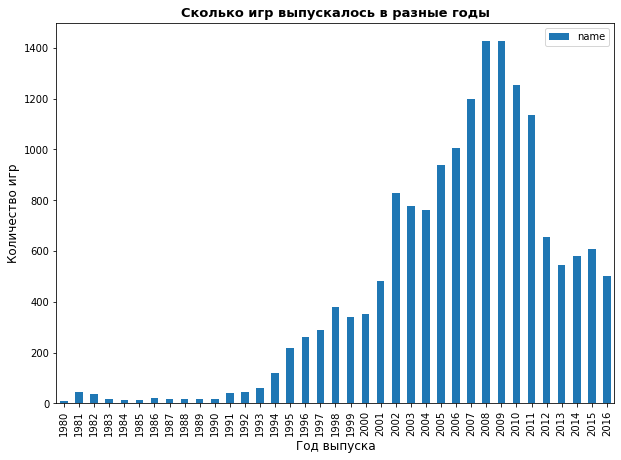

In [15]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.plot(y='name', kind='bar', figsize=(10,7))
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.title('Сколько игр выпускалось в разные годы', fontsize=13, fontweight='bold')
plt.show()

In [16]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

До 95 года игрры выпускались в очень маленьком объеме, с 1995 пошел прирост игр и начиная с 00х пошел полноценный рост.
Наибольшее количество игр выпускалось в 2008-2009гг, после этого пошел спад.
Далее игровая индустрия пошла на спад, вероятнее всего из-за игр на смартфонах.

ТОП платформы это wii, nes, gb

<AxesSubplot:ylabel='platform'>

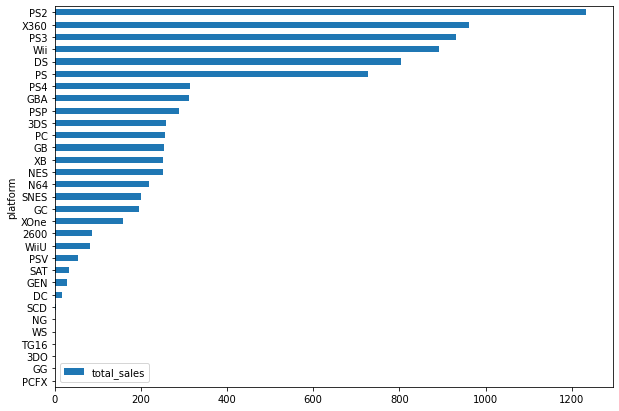

In [17]:
# изменения продаж по платформам
df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=True)\
.plot(y='total_sales', kind='barh',  figsize=(10,7))

In [18]:
#Выстроим по продажам
platform_grouped = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_grouped.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0.5, 1.0, 'PS2')

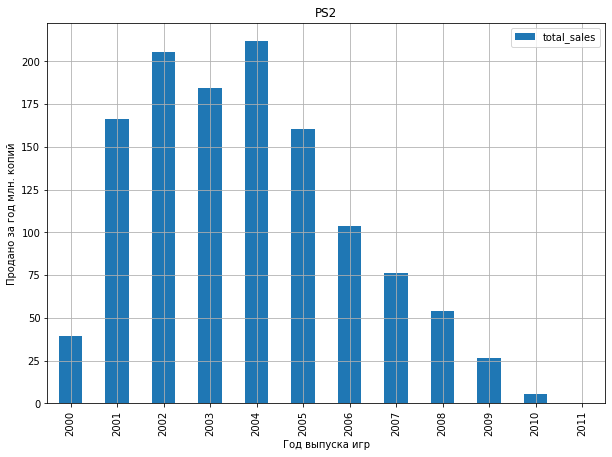

In [19]:
df[df['platform'] == 'PS2'].groupby('year_of_release').agg({'total_sales':'sum'}).plot(kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Продано за год млн. копий')
plt.title('PS2')

PS2 поддерживала игры с 2000 по 2011 (11 лет)

Text(0.5, 1.0, 'XBOX 360')

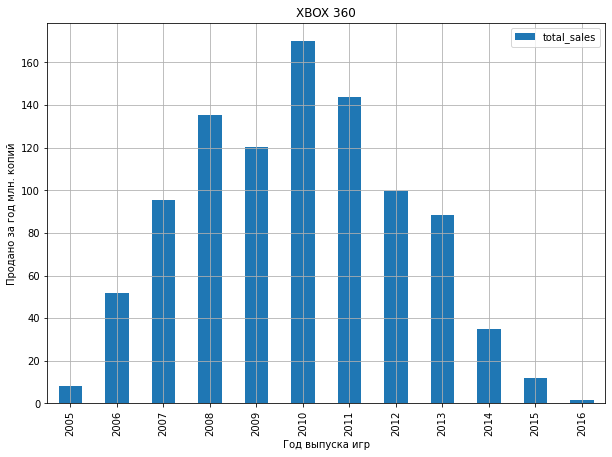

In [20]:
df[df['platform'] == 'X360'].groupby('year_of_release').agg({'total_sales':'sum'}).plot(kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Продано за год млн. копий')
plt.title('XBOX 360')

XBOX 360 поддерживала игры с 2005 по 2016 (11 лет)

Text(0.5, 1.0, 'PS3')

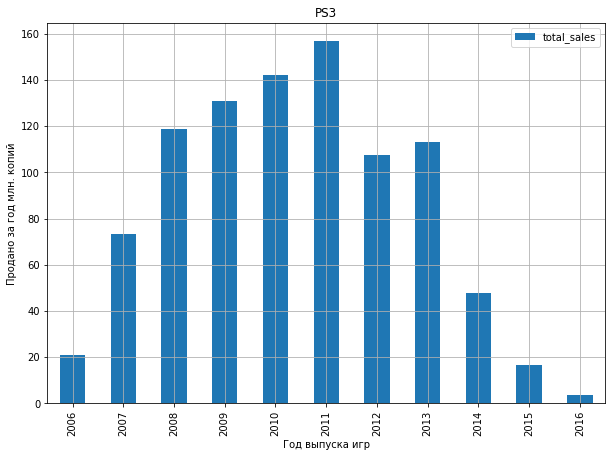

In [21]:
df[df['platform'] == 'PS3'].groupby('year_of_release').agg({'total_sales':'sum'}).plot(kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Продано за год млн. копий')
plt.title('PS3')

PS3 поддерживала игры с 2006 по 2016 (10 лет)

Text(0.5, 1.0, 'Nintendo Wii')

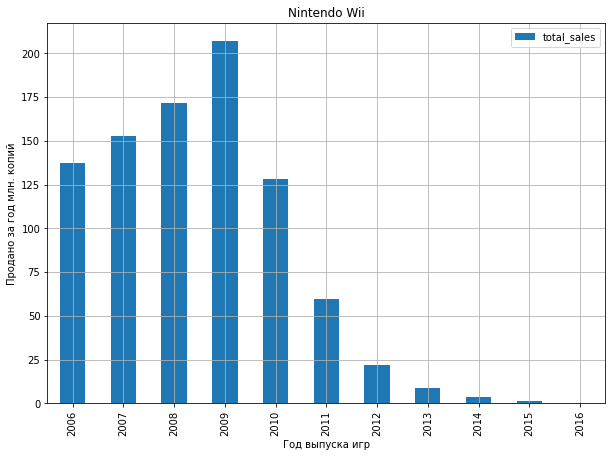

In [22]:
df[df['platform'] == 'Wii'].groupby('year_of_release').agg({'total_sales':'sum'}).plot(kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Продано за год млн. копий')
plt.title('Nintendo Wii')

Nintendo Wii поддерживала игры с 2006 по 2016 (10 лет)

Text(0.5, 1.0, 'Nintendo DS')

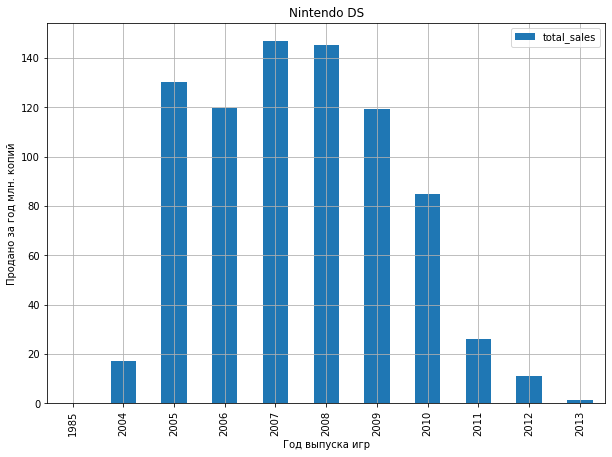

In [23]:
df[df['platform'] == 'DS'].groupby('year_of_release').agg({'total_sales':'sum'}).plot(kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Продано за год млн. копий')
plt.title('Nintendo DS')

Nintendo DS поддерживала игры с 2004 по 2013 (9 лет)

Text(0.5, 1.0, 'PS1')

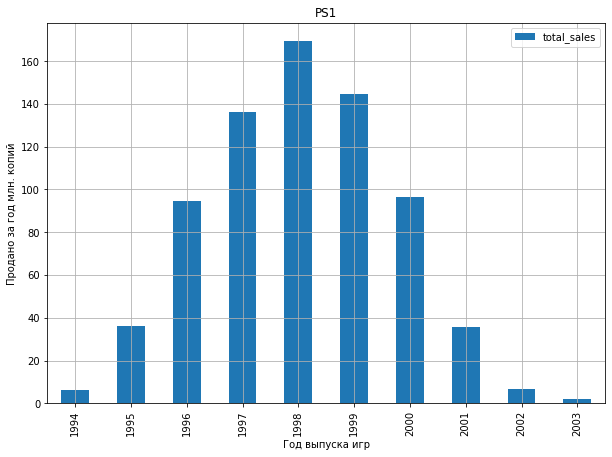

In [24]:
df[df['platform'] == 'PS'].groupby('year_of_release').agg({'total_sales':'sum'}).plot(kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Год выпуска игр')
plt.ylabel('Продано за год млн. копий')
plt.title('PS1')

PS1 поддерживала игры с 1994 по 2003 (9 лет)

## Вывод:
В среднем консоль "живет" 10 лет, но топовые продажи показывает всего 5-7 лет.
В начале идет постепенный рост по причине дороговизны консоли и небольшого количества игр, после пика через несколько лет выходит новая консоль.

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

<AxesSubplot:ylabel='platform'>

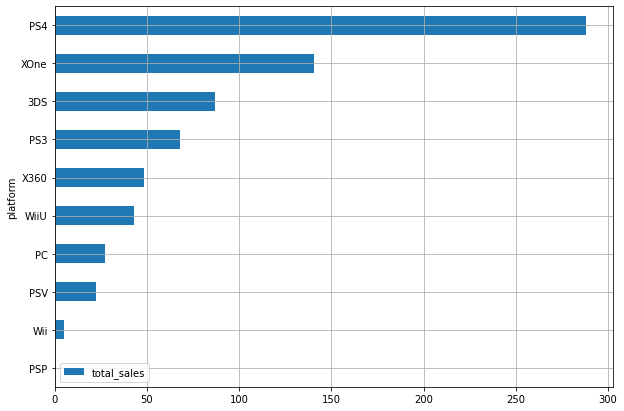

In [25]:
df.query('year_of_release >= 2014')\
.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=True)\
.plot(y='total_sales', kind='barh', figsize=(10,7), grid = True)

С 14 по 16 года самыми популяными платформиами были ps4, xone, 3ds, ps3, x360, wiiu, pc, psv, wii, psp/
ps3, x360, wii и psp доживают свои последние годы, так что на них можно не заострять внимания.
Создадим датасет с "амбициозными платформами"

In [26]:
top_df = df.query('year_of_release >= 2014 and platform == ["PS4", "XOne", "WiiU", "3DS", "PC", "PSV"]')
display(top_df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


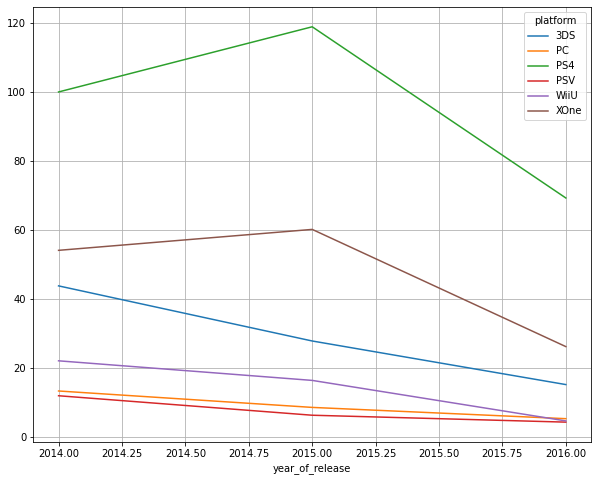

In [27]:
top_df.pivot_table(index = 'year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(10,8), grid=True)
plt.show()

Как видно по графику, к 2015г только 2 платформы шли на подъем, это ps4 и xbox one, остальные плавно шли на спад.
    Но как я помню ps5 вышла тоьлко в 2020г и актуальность платформы ps4 была велика до этого момента. Хотя в текущей ситуации мы видим чтто в 2021 и 22гг стоимость ps4 приблизительно такая же как и в старте продаж)) 

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 2.0)

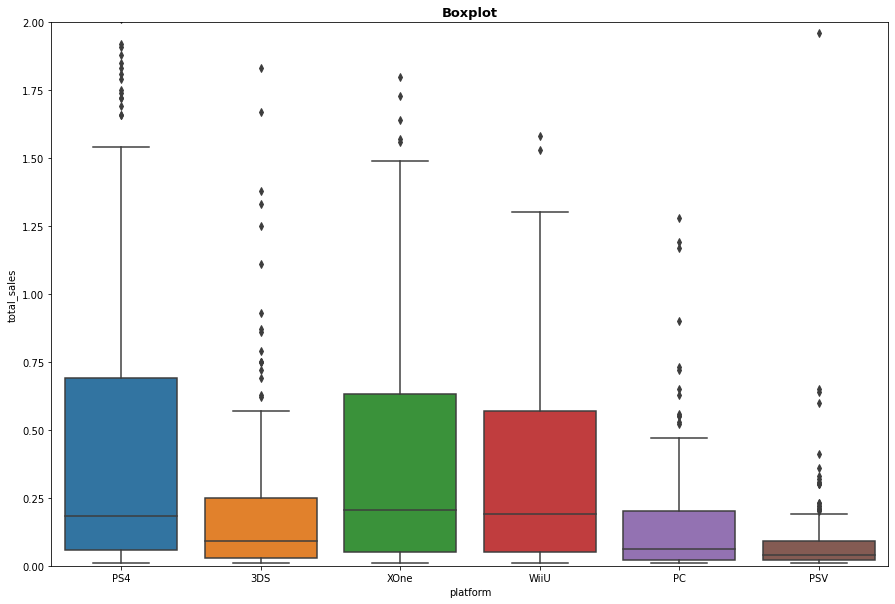

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top_df, x='platform', y='total_sales')
plt.title('Boxplot', fontsize=13, fontweight='bold')
plt.ylim([0, 2])


По ящику с усами видно что у ps4 продажи больше чем у других платфоррм, но при этом медиана у xbox one и wiiu выше.


- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

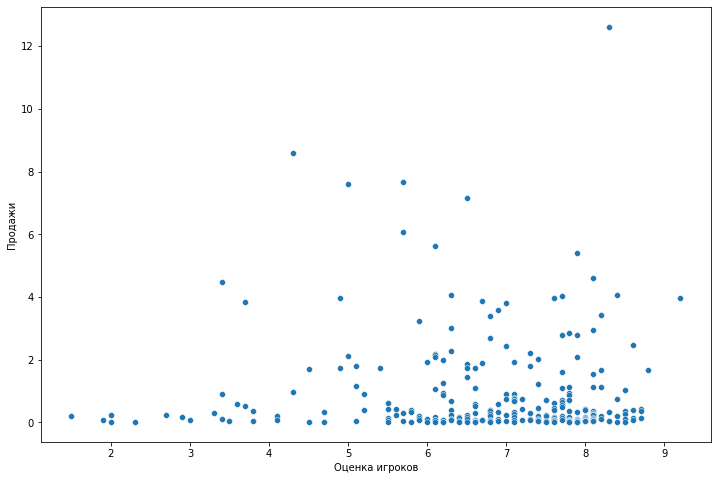

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='user_score', y='total_sales', data=df.query('platform == "PS4"'))
plt.xlabel('Оценка игроков', fontsize=10)
plt.ylabel('Продажи',fontsize=10)
plt.show()

По диаграмме рассеяния не видно особой зависимости между оценками игроков и продажами

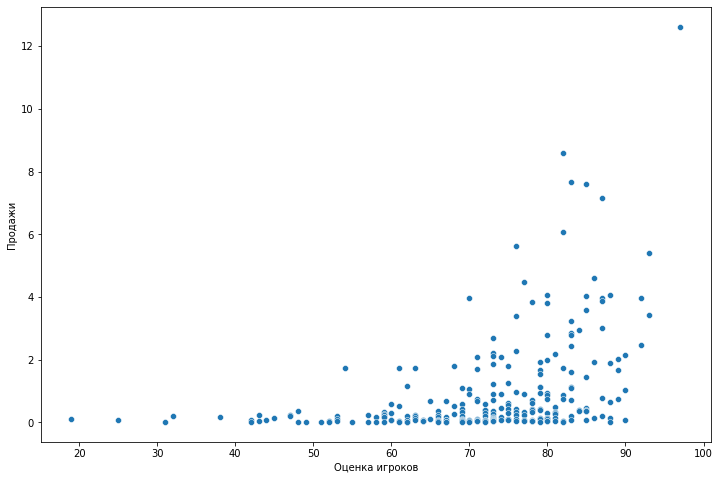

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='critic_score', y='total_sales', data=df.query('platform == "PS4"'))
plt.xlabel('Оценка игроков', fontsize=10)
plt.ylabel('Продажи',fontsize=10)
plt.show()

Зависимость между оценками критиов и продажами имеется. Рассмотрим куорреляцию

In [31]:
df.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


## Вывод: 
По корреляции видно что между оценками пользователей и продажами нет зависимости. Оценки критиков оказывают не существенное влиянике на продажи. Т.е. оценки вообще практически не влияют на продапжи


- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

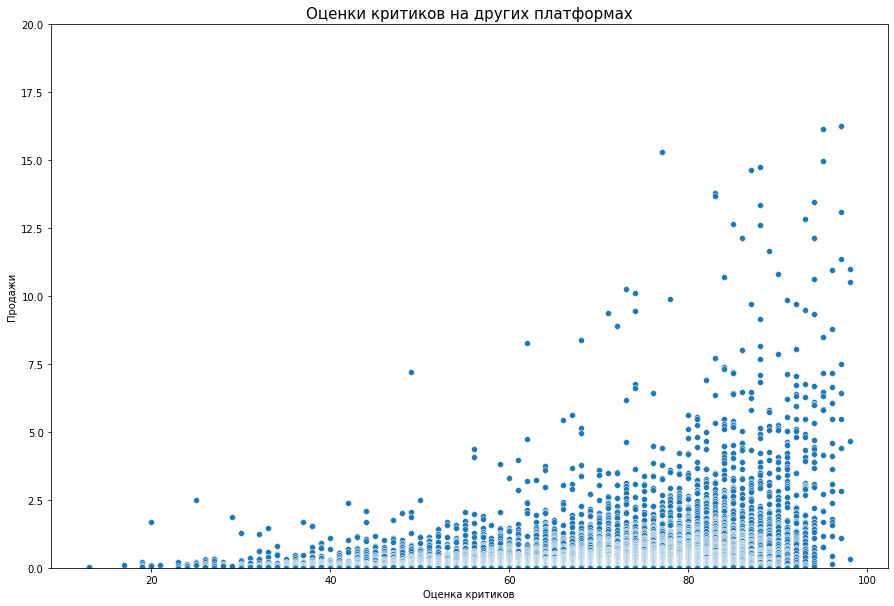

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='critic_score', y='total_sales', data=df.query('platform != "PS4"'))
plt.title('Оценки критиков на других платформах', fontsize=15)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.ylim([0,20])
plt.show()

In [33]:
df.query('platform != "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.240339,0.092717
critic_score,0.240339,1.000000,0.583367
user_score,0.092717,0.583367,1.000000


По корреляции видно что и по другим платформам отсутствует зависимсость между оценками и продажами

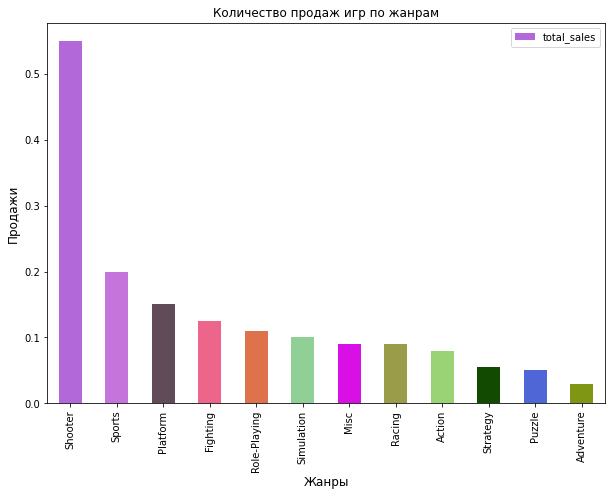

In [34]:
top_df.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)\
.plot(y='total_sales', kind='bar', color=np.random.rand(12,3), figsize=(10,7))
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.title('Количество продаж игр по жанрам', fontsize=12)
plt.show()

- Старый комментарий: По продажам ТОП жанр это Экшен. За ним идет шутеры и РПГ. Логично предположить что данные жанры лучше рекламируются и чаще выходят, за счет этого и продажи лучше
- Новый коммент: используя медийное значение ярко выражены продажи в жанре шутер. Логично, т.к. данный жанр хорошо продается во всех регионах. Далее идет спорт

## Вывод:
До 95г выпускались игры в небольшом количестве. Дале пошел рост и с 2002 года был огромный скачок из-за консоли PS2.
Пик релизов был в 2008-2009гг, далее идет спад, вероятнее всего из-за создания мобильных игр
Самые популярные платформы с 2014 по 2016гг были: Xbox 1, ps3, wii, ds, ps1, ps4, 3ds
Больше всего продапж было у PS4/
Между оценками пользователей, критиков и продажами нет взаимосвязи
Самые поулярные жанры - экшен, шутеры и рпг.

# Составьте портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [35]:
regions_df = top_df.pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
display(regions_df)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS4,130.04,15.02,98.61
PSV,3.53,14.54,2.52
WiiU,13.15,7.31,19.36
XOne,46.25,0.32,81.27


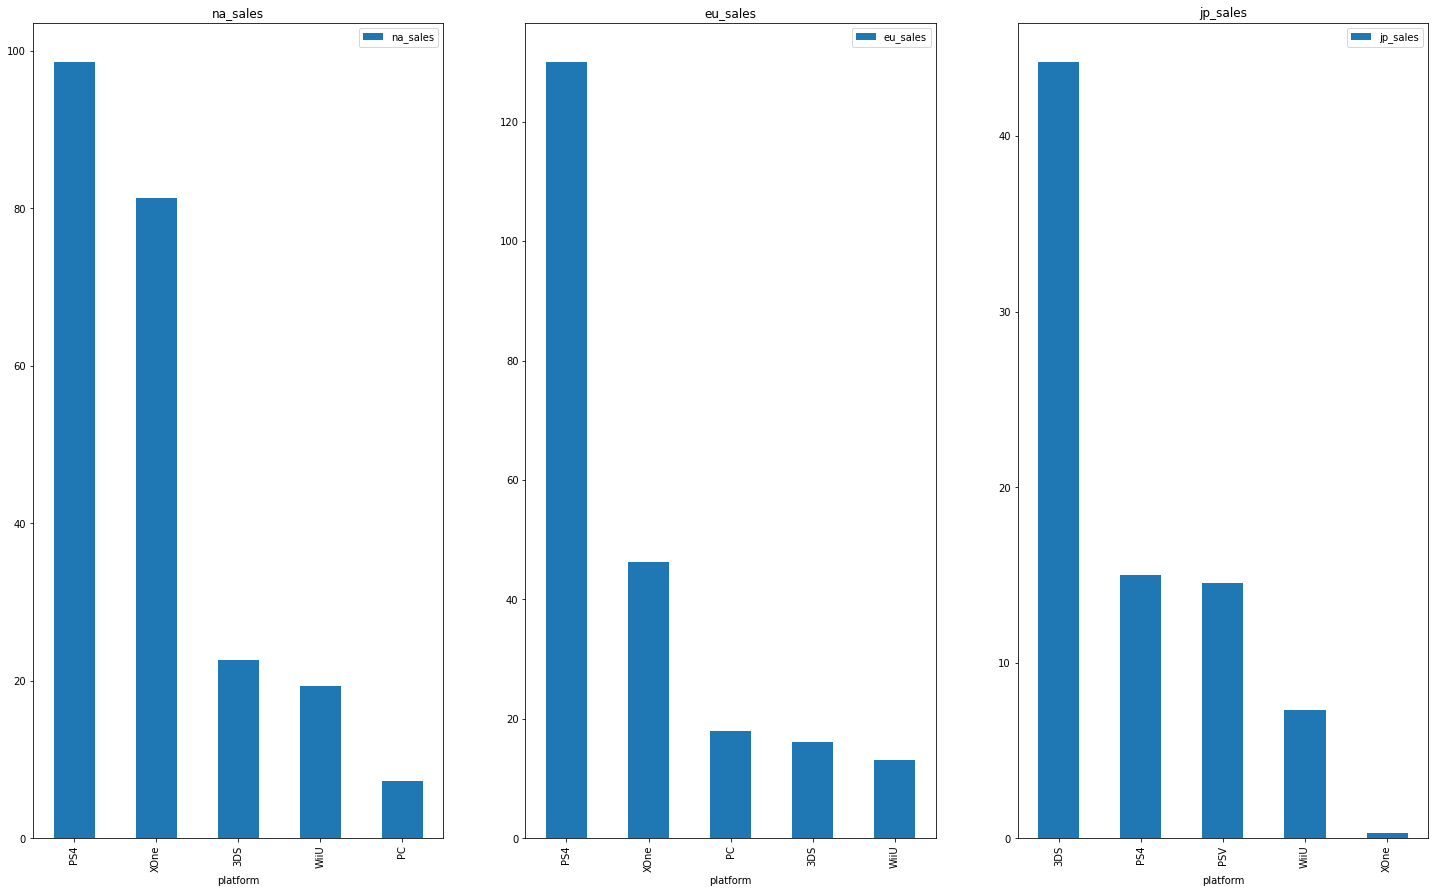

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

regions_df.sort_values(by ='na_sales', ascending=False).head(5)\
.plot(ax=axes[0], y='na_sales', kind='bar', title='na_sales')

regions_df.sort_values(by ='eu_sales', ascending=False).head(5)\
.plot(ax=axes[1], y='eu_sales', kind='bar', title='eu_sales')

regions_df.sort_values(by ='jp_sales', ascending=False).head(5)\
.plot(ax=axes[2], y='jp_sales', kind='bar', title='jp_sales')
plt.show()

Для американского и европейского регионов самая популярная консоль - PS4, в то время как в японии это Nintendo 3ds, вероятнее всего в Японии чаще используют портативные консоли. В Америке большая игровая индустрия направленав на PS и XBOX ONE, ну а европа следует за веянием американской моды

Самые популярные жанры (топ-5). Поясните разницу.

In [37]:
regions_genre_df = top_df.pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
display(regions_genre_df)

,eu_sales,jp_sales,na_sales
genre,,,
Action,63.49,24.71,60.16
Adventure,4.96,3.18,3.92
Fighting,6.03,5.01,11.23
Misc,8.38,5.17,10.26
Platform,6.35,2.67,6.45
Puzzle,0.52,0.89,0.65
Racing,12.92,1.64,7.72
Role-Playing,25.94,28.70,29.74
Shooter,56.23,4.21,66.29


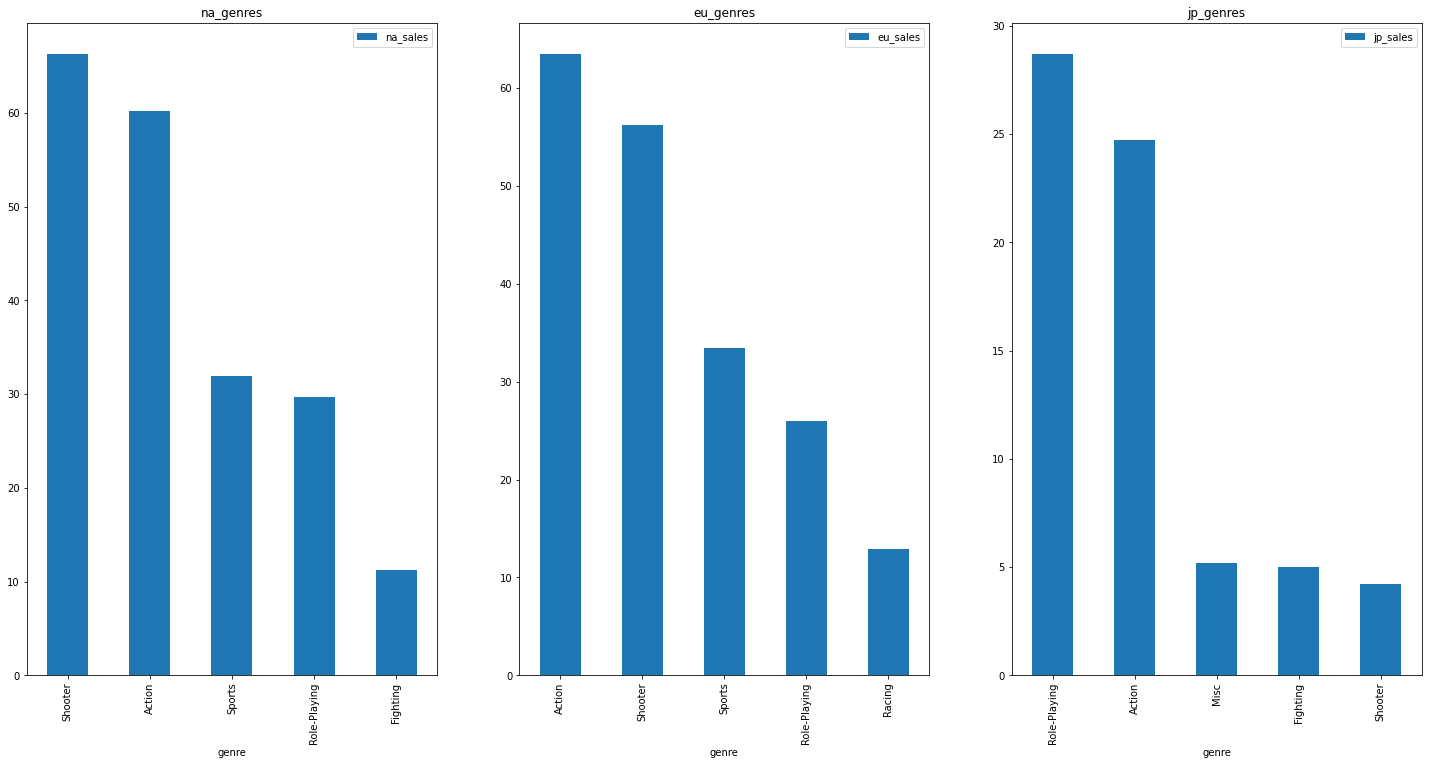

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(25, 12))

regions_genre_df.sort_values(by ='na_sales', ascending=False).head(5)\
.plot(ax=axes[0], y='na_sales', kind='bar', title='na_genres')

regions_genre_df.sort_values(by ='eu_sales', ascending=False).head(5)\
.plot(ax=axes[1], y='eu_sales', kind='bar', title='eu_genres')

regions_genre_df.sort_values(by ='jp_sales', ascending=False).head(5)\
.plot(ax=axes[2], y='jp_sales', kind='bar', title='jp_genres')
plt.show()

Здесь есть небольшие различия между америкой и европой. в америке лидируют шутеры, в то время как в европе это экшен.
Но при этом, если судить, по общей картине, то первые 4 жанра идентичны, в то вренмя как в японии лидирует именно РПГ из-за любви к онлайн геймингу и вероятнее всего из-за культуры

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
esrb_df = top_df.pivot_table(index= ['rating'], values = ('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
display(esrb_df)

,eu_sales,jp_sales,na_sales
rating,,,
E,45.90,8.29,37.65
E10+,17.89,4.32,23.53
M,82.38,6.40,82.23
T,30.09,11.99,32.46
no_rating,50.80,50.43,55.76


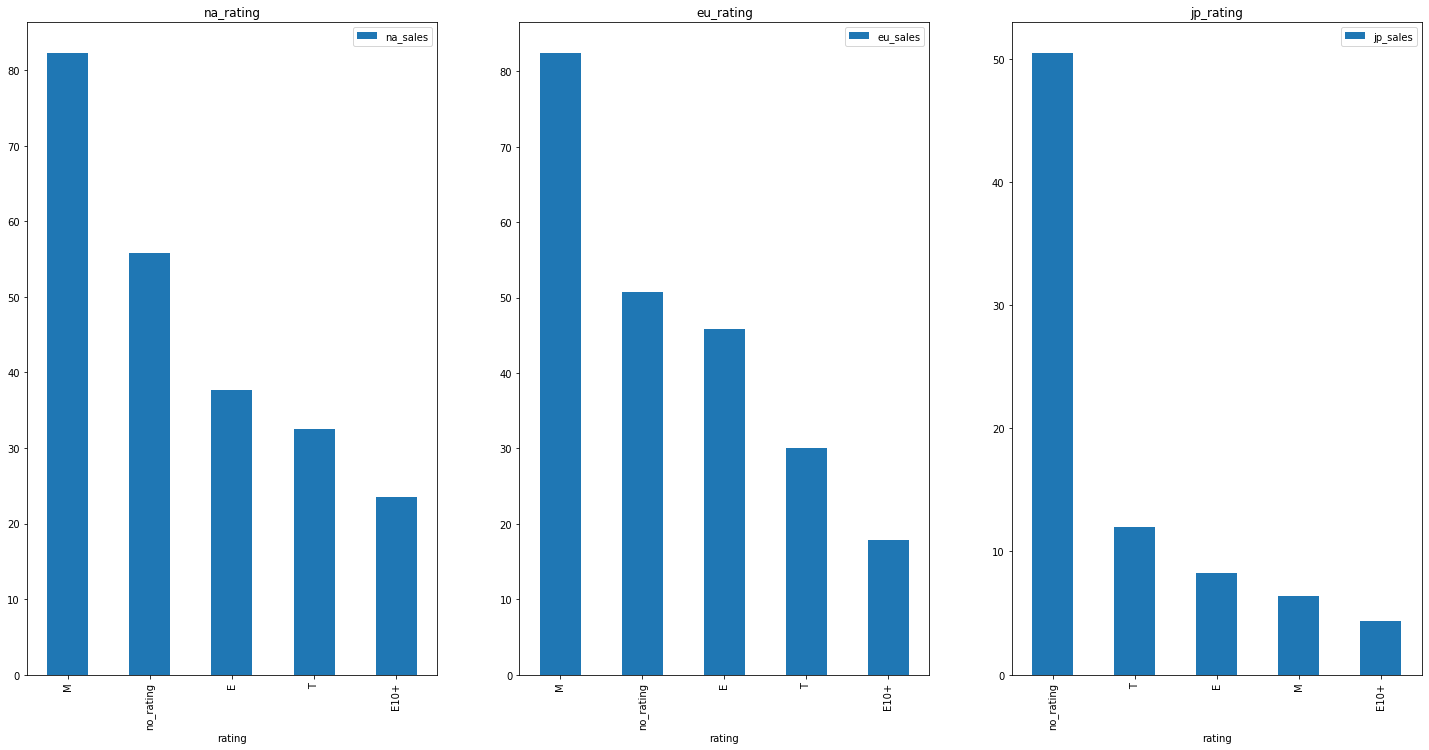

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(25, 12))

esrb_df.sort_values(by ='na_sales', ascending=False).head(5)\
.plot(ax=axes[0], y='na_sales', kind='bar', title='na_rating')

esrb_df.sort_values(by ='eu_sales', ascending=False).head(5)\
.plot(ax=axes[1], y='eu_sales', kind='bar', title='eu_rating')

esrb_df.sort_values(by ='jp_sales', ascending=False).head(5)\
.plot(ax=axes[2], y='jp_sales', kind='bar', title='jp_rating')
plt.show()

По рейтингам на первом месте в европе и северной америке М (mature), дальше идут игры без рейтинга.
В японии же без рейтинга игры на первом месте, далее Т(teen). Скорее всего игры на японской площадке нельзя отнести к конкретному рейтингу либо же в связи с жесткими законами у них проблема с продаажей игр в конкретном рейтинге.

#  Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
- Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

In [42]:
xone = top_df.query('platform == "XOne"').user_score.dropna()
pc = top_df.query('platform == "PC"').user_score.dropna()
print('Дисперсия пользовательского рейтинга на Xbox One', np.var(xone, ddof=1))
print('Дисперсия пользовательского рейтинга на PC', np.var(pc, ddof=1))

Дисперсия пользовательского рейтинга на Xbox One 1.8910066518847013
Дисперсия пользовательского рейтинга на PC 2.901154315133451


Дисперсии отличаются больше чем на 5%, по этому equal_var = False

In [43]:
alpha = 0.05 
results = st.ttest_ind(xone, pc, equal_var= False)

print('p-значение:', results.pvalue.round(3))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.116
Не получилось отвергнуть нулевую гипотезу


In [ ]:
data[data['col'].isna() == True]

Нам не получилось отвергнуть нулевую гипотез, из этого следует что игры на xbox и pc  сопоставимыв

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая и альтернативная гипотезы:
- Н0 - Средние пользовательские рейтинги одинаковые
- Р1 - средние пользовательские рейтинги разные

In [44]:
action = top_df.query('genre == "Action"').user_score.dropna()
sports = top_df.query('genre == "Sports"').user_score.dropna()
print('Дисперсия пользовательского рейтинга жанра action', np.var(xone, ddof=1))
print('Дисперсия пользовательского рейтинга жанра sports', np.var(pc, ddof=1))

Дисперсия пользовательского рейтинга жанра action 1.8910066518847013
Дисперсия пользовательского рейтинга жанра sports 2.901154315133451


In [45]:
alpha = 0.05 
results = st.ttest_ind(action, sports, equal_var= False)

print('p-значение:', results.pvalue.round(3))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


р-значение равно нулю, по этому вероятность того что средние пользовательские рейтинги данных жанров очень мала и мы отвергаенм нулевую гипотезу.
Посмотрим разницу

In [46]:
print ('Средний пользовательский рейтинг жанра Action:', action.mean())
print ('Средний пользовательский рейтинг жанра Sports:', sports.mean())
print ('Разница составляет:', (1 - (sports.mean()/action.mean())).round(2))

Средний пользовательский рейтинг жанра Action: 6.828163265306123
Средний пользовательский рейтинг жанра Sports: 5.6360465116279075
Разница составляет: 0.17


Разница в рейтинге между жанром спорт и экшен составила 17%

## Вывод:
- Средние пользовательские рейтинги платформ xbox one и pc одинаковые
- Средние пользовательские рейтинги жанров экшен и спорт разные

# Общий вывод:
1. В датасете 16715 строк и 11 столбцов. Данные предоставлены за период с 1980 по 2016гг.
2. В предобработке данных было сделано:
- названия столбцов преобразовыаны к нижнему регистру
- были изменены типы данных в стобцах: year_of_release, user_score
- данные tbd были заменены на значения nan
- Пропуски в счтолбцах name и year_of_release были удалены
- Пропуски в столбцах critical_score, user_score, rating  оставлены, т.к. заменить нечем
3. Результат исследовательского анализа данных:
- До 1995г игры выпускалтись в небольшом количестве
- Пик по количеству игр был в 2008-2009гг., после пика идет спад из-за появления мобильных игр
- Больше всего игр продано на ps2, далее идет xbox360, а на третьем месте ps1
- В среднем консоль "живет" около 10 лет
- Самые популярные платформы на 2014-2016гг были ps4 и xbox one, nintendo 3ds, ps3, однако большинство из них "доживало последние года"
- На консоли ps4 продаж больше чем на других платформах, по этому для анализща взяли ее
- Между оценкой пользователей и количеством проданных игр нет связи, но при этом
4. Составлен портрет пользователя каждого региона:
- игровые рынки европы и америки схожи, популярны одни платформы и жанры и игр с определенным рейтингом ESRB. Среди платформ лидируют ps4, xbox one, среди жанров популярны экшен и шутеры.
- В японии же лидирует nintendo ds, популярны ролевые игры от внутренних разрабов. 

5. При проверке гипотез выявлено:
- средние пользовательские рейтинги игр на xbox one и pc одинаковые
- средние пользовательские рейтинги жанров экшен и спорт разные
